### Toyota_Corolla data => Predict the price based on the following input parameters:-

**Input variables => 16**
1. Age (numeric)
2. Job : Type of Job (categorical: Admin., Unknown, Unemployed, Management, Housemaid, Entrepreneur, Student,  Blue-collar,  Self-employed, Retired, Technician, Services) 
3. Marital : Marital status (categorical: married, divorced, single)           
   *Note: Divorced means Divorced or Widowed*
4. Education : (categorical: "unknown","secondary","primary","tertiary") 
5. Default: has credit in default? (Binary: "yes","no") 
6. Balance: average yearly balance => in euros (numeric) 
7. Housing: has housing loan? (Binary: "yes","no") 
8. Loan: has personal loan? (Binary: "yes","no")
9. Contact : contact communication type (categorical: ‘cellular’, ‘telephone’)
10. Month: last contact month of the year (categorical : ‘jan’, ‘feb’, ‘mar’,…..,’nov’, ’dec’)
11. Day_of_the_week : last cantact day of the week (categorical: ‘mon’, ‘tue’, ‘wed’, ‘thu’, ‘ fri’)
12. Duration : last contact duration, in seconds (numeric).
13. Campaign : number of contact performed during this campaign and for this client (‘numeric’, includes last contact)
14. pdays : number of days tat passed after the client last contacted from a previous campaign (numeric ; 999 mean client was not previously connected)
15. previous : number of contacts performed before this campaign and for this client (numeric)
16. poutcome : outcome of the previous marketing campaign ( categorical : ‘failure’ , ‘nonexistant’, ‘success’)

##### y  => Whether the client has subscribed a term deposit or not  (Output variable)  
##### Binomial ("yes" or "no")

## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## 2. Importing dataset

In [2]:
bank_data = pd.read_csv("bank-full.csv", sep=";")    # Used sep function and got the data in different columns
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3. Initial Data Analysis

In [3]:
bank_data.shape       # To get the total no. of rows and columns

(45211, 17)

In [4]:
bank_data.isna().sum()      # To check for null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank_data.dtypes          # To get the datatypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
bank_data.columns           # For understanding the input parameters of the given dataset

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
bank_data['poutcome'] = bank_data.y.map({'no':0, 'yes':1})   
bank_data.head()                                      

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,0,no


**Used map() to execute a specified function like '0' or '1' instead of 'unknown' for "poutcome" on the basis of "y"**

## 4. Data Visualization & Feature Selection

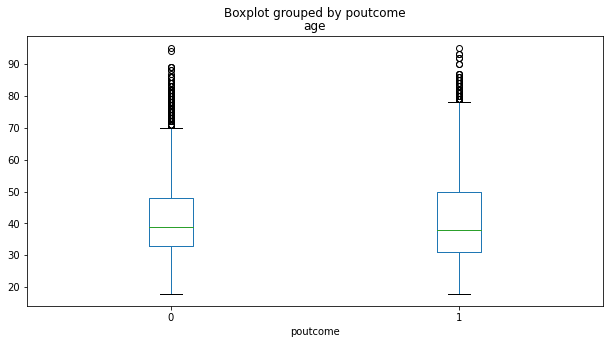

In [10]:
bank_data.boxplot(column='age', by='poutcome', grid= False, figsize= (10,5))      # Age vs poutcome
plt.show()

**Many Outliers can be seen, so "Age" cannot be considered as a good feature against "poutcome".**

In [11]:
bank_data.groupby('job').poutcome.mean()

job
admin.           0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137556
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: poutcome, dtype: float64

**We can conclude that all the datapoints will lie closer to each other and there will be no outlier in such case so we can consider all of them as good features against poutcome.**

##### Creating dummy variables for categorical feature - Job

In [12]:
job_dummies = pd.get_dummies(bank_data.job, prefix='job')
job_dummies.drop(job_dummies.columns[0], axis=1, inplace=True)

In [13]:
bank_data.groupby('default').poutcome.mean()    # Default is a useful feature

default
no     0.117961
yes    0.063804
Name: poutcome, dtype: float64

In [14]:
bank_data['default'] = bank_data.default.map({'no':0, 'unknown':1, 'yes':1})   # Converted Default to numeric form

**Used map() to execute a specified function like '0' or '1' instead of 'unknown' for "default"**

In [15]:
bank_data['contact'] = bank_data.contact.map({'cellular':0, 'telephone':1})    # Converted Contact to numeric form

**Used map() to execute a specified function like '0' or '1' instead of 'unknown' for "contact"**

In [16]:
bank_data['y'] = bank_data.y.map({'no':0, 'yes':1})    # Converted y to numeric form

**Used map() to execute a specified function like '0' or '1' instead of 'yes' or 'no' for "y"**

In [17]:
bank_data.groupby('month').poutcome.mean()        # Month is also a useful feature

month
apr    0.196794
aug    0.110133
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090935
jun    0.102228
mar    0.519916
may    0.067195
nov    0.101511
oct    0.437669
sep    0.464594
Name: poutcome, dtype: float64

In [18]:
bank_data.groupby('month').poutcome.agg(['count', 'mean']).sort_values('count')  

,count,mean
month,,
dec,214,0.467290
mar,477,0.519916
sep,579,0.464594
oct,738,0.437669
jan,1403,0.101212
feb,2649,0.166478
apr,2932,0.196794
nov,3970,0.101511
jun,5341,0.102228


*By looking at the number of calls per month we conclude that Month vs Outcome is a doubtful parameter.* 

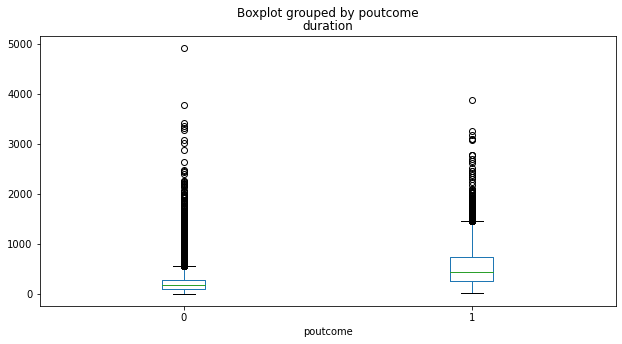

In [19]:
bank_data.boxplot(column='duration', by='poutcome', grid= False, figsize= (10,5))       # Duration vs poutcome
plt.show()

 **Many Outliers can be seen in Duration vs Outcome plot so we cannot consider 'Duration' as a useful feature.**

In [20]:
bank_data.groupby('previous').poutcome.mean()      # Previous can be considered as a useful parameter

previous
0      0.091573
1      0.210317
2      0.216524
3      0.257443
4      0.239496
5      0.263617
6      0.299639
7      0.263415
8      0.302326
9      0.260870
10     0.388060
11     0.230769
12     0.227273
13     0.236842
14     0.263158
15     0.050000
16     0.000000
17     0.200000
18     0.000000
19     0.181818
20     0.125000
21     0.250000
22     0.166667
23     0.125000
24     0.000000
25     0.000000
26     0.500000
27     0.000000
28     0.000000
29     0.250000
30     0.333333
32     0.000000
35     0.000000
37     0.000000
38     0.000000
40     0.000000
41     0.000000
51     0.000000
55     1.000000
58     1.000000
275    0.000000
Name: poutcome, dtype: float64

In [21]:
bank_data.groupby('poutcome').poutcome.mean() 

poutcome
0    0
1    1
Name: poutcome, dtype: int64

In [22]:
poutcome_dummies = pd.get_dummies(bank_data.poutcome, prefix='poutcome')
poutcome_dummies.drop(poutcome_dummies.columns[0], axis=1, inplace=True)

In [23]:
bank = pd.concat([bank_data, job_dummies, poutcome_dummies], axis=1)

## 5. Model Building 

In [24]:
feature_cols = ['default', 'contact', 'previous'] + list(bank.columns[-13:])
X = bank[feature_cols]

In [25]:
X.isna().sum()

default                  0
contact              13020
previous                 0
y                        0
job_blue-collar          0
job_entrepreneur         0
job_housemaid            0
job_management           0
job_retired              0
job_self-employed        0
job_services             0
job_student              0
job_technician           0
job_unemployed           0
job_unknown              0
poutcome_1               0
dtype: int64

In [26]:
X = X.fillna('0')          # Because contact had null values  

In [27]:
y = bank.poutcome

In [28]:
X.head()

,default,contact,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_1
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [29]:
X.tail()

,default,contact,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_1
45206,0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
45207,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
45208,0,0.0,3,1,0,0,0,0,1,0,0,0,0,0,0,1
45209,0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
45210,0,0.0,11,0,0,1,0,0,0,0,0,0,0,0,0,0


**Conclusion:-**
- The final poutcome_success  says, the outcome 1 from the above output says that the client has subscribed a term deposit and 0 says the client not subscribed the term deposit.

#### Train-test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)

*Feature Scaling*

In [31]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
std_sc.fit_transform(X_train, y_train)

array([[-0.13580851, -0.26162381, -0.24332546, ..., -0.17409749,
        -0.08034875, -0.36397743],
       [-0.13580851, -0.26162381,  0.17423932, ..., -0.17409749,
        -0.08034875, -0.36397743],
       [-0.13580851, -0.26162381, -0.24332546, ...,  5.74390818,
        -0.08034875, -0.36397743],
       ...,
       [-0.13580851, -0.26162381, -0.24332546, ...,  5.74390818,
        -0.08034875, -0.36397743],
       [-0.13580851, -0.26162381, -0.24332546, ..., -0.17409749,
        -0.08034875, -0.36397743],
       [-0.13580851, -0.26162381, -0.24332546, ..., -0.17409749,
        -0.08034875, -0.36397743]])

In [32]:
std_sc.fit_transform(X_test, y_test)

array([[-0.13420854, -0.26395295, -0.30131002, ...,  6.0693344 ,
        -0.0789381 , -0.36400334],
       [-0.13420854,  3.78855393, -0.30131002, ..., -0.16476271,
        -0.0789381 , -0.36400334],
       [ 7.45109052, -0.26395295,  0.22663931, ..., -0.16476271,
        -0.0789381 , -0.36400334],
       ...,
       [-0.13420854, -0.26395295,  7.6179299 , ..., -0.16476271,
        -0.0789381 , -0.36400334],
       [-0.13420854, -0.26395295, -0.30131002, ..., -0.16476271,
        -0.0789381 , -0.36400334],
       [-0.13420854, -0.26395295, -0.30131002, ..., -0.16476271,
        -0.0789381 , -0.36400334]])

## 6. Model Training

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

## 7. Model Testing

***Train data***

In [34]:
y_train_pred = log_reg.predict(X_train) 

***Test data***

In [35]:
y_test_pred = log_reg.predict(X_test)

## 8. Model Testing

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

##### Training data

In [37]:
print("Accuracy score of train data : ", accuracy_score(y_train, y_train_pred))

Accuracy score of train data :  1.0


In [38]:
confusion_matrix(y_train, y_train_pred)

array([[31937,     0],
       [    0,  4231]], dtype=int64)

In [39]:
print("Precision score of train data : ", precision_score(y_train, y_train_pred))

Precision score of train data :  1.0


In [40]:
print("Recall score of train data : ", recall_score(y_train, y_train_pred))

Recall score of train data :  1.0


In [41]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31937
           1       1.00      1.00      1.00      4231

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



1.0


Text(0, 0.5, 'True Positive Rate')

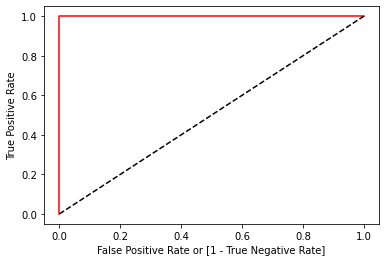

In [42]:
from sklearn.metrics import roc_curve,roc_auc_score          # Visualization of the results of Logistic Regression
fpr, tpr, thresholds = roc_curve(y, log_reg.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_train_pred)
print(auc)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

##### Test data

In [43]:
print("Accuracy score of test data : ", accuracy_score(y_test, y_test_pred))

Accuracy score of test data :  1.0


In [44]:
confusion_matrix(y_test, y_test_pred)

array([[7985,    0],
       [   0, 1058]], dtype=int64)

In [45]:
print("Precision score of test data : ", precision_score(y_test, y_test_pred))

Precision score of test data :  1.0


In [46]:
print("Recall score of test data : ", recall_score(y_test, y_test_pred))

Recall score of test data :  1.0


In [47]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31937
           1       1.00      1.00      1.00      4231

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



## 9. Model Deployment

In [48]:
from pickle import dump, load

#### Pickling / Serialization

In [49]:
dump(log_reg, open('log_reg.pkl','wb')) #write bytes 

#### # Unpickling / deserialization

In [50]:
log_reg_pickle = load(open('log_reg.pkl','rb')) 

In [51]:
pickle_pred = log_reg_pickle.predict(X_test)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**